In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

B:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataframeX = pd.read_csv('smallset.csv',usecols=[5,6,7,8])
dataframeY = pd.read_csv('smallsetY.csv',usecols=[8])
#print(dataframeX.index.values)
print(dataframeX)
X = dataframeX.as_matrix()
Y = dataframeY.as_matrix()


       open    high     low   close
0    135.30  135.98  132.10  134.21
1    134.44  147.49  134.00  144.54
2    144.00  146.93  134.05  139.00
3    139.00  139.89  107.72  116.99
4    116.38  125.60   92.28  105.21
5    106.25  108.13   79.10   97.75
6     98.10  115.00   92.50  112.50
7    112.90  118.80  107.14  115.91
8    115.98  124.66  106.64  112.30
9    112.25  113.44   97.70  111.50
10   109.60  115.78  109.60  113.57
11   113.20  113.46  109.26  112.67
12   112.80  122.00  111.55  117.20
13   117.70  118.68  113.01  115.24
14   115.64  117.45  113.44  115.00
15   114.82  118.70  114.50  117.98
16   117.98  119.80  110.25  111.50
17   111.40  115.81  103.50  114.22
18   114.22  118.76  112.20  118.76
19   118.21  125.30  116.57  123.02
20   123.50  125.25  122.30  123.50
21   123.21  124.50  119.57  121.99
22   122.50  123.62  120.12  122.00
23   122.02  123.00  121.21  122.88
24   122.89  124.00  122.00  123.89
25   123.80  126.93  123.10  126.70
26   126.30  133.85  125.72 

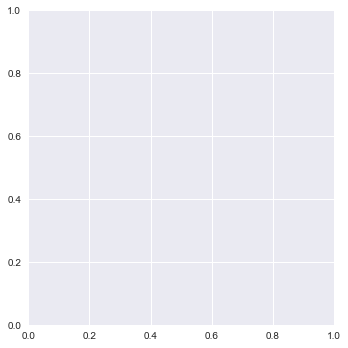

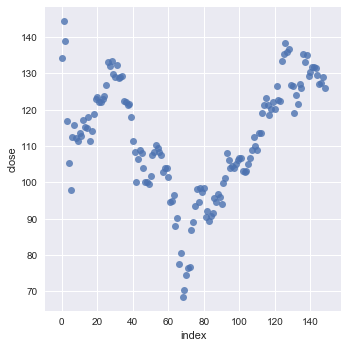

In [9]:
sns.lmplot('index','close', data=dataframeX.reset_index(),fit_reg=False)
sns.plt.show()

In [7]:
model = Sequential()
model.add(Dense(1,input_shape=(4,)))
model.add(Activation('linear'))

sgd = SGD(0.01)

model.compile(loss='msle',optimizer=sgd,
             metrics=['msle'])

H = model.fit(X,Y,nb_epoch=10)

B:\anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
149/149 [==============================] - 0s - loss: 0.0170 - mean_squared_logarithmic_error: 0.0170     
Epoch 2/10
149/149 [==============================] - 0s - loss: 0.0140 - mean_squared_logarithmic_error: 0.0140     
Epoch 3/10
149/149 [==============================] - 0s - loss: 0.0127 - mean_squared_logarithmic_error: 0.0127     
Epoch 4/10
149/149 [==============================] - 0s - loss: 0.0120 - mean_squared_logarithmic_error: 0.0120     
Epoch 5/10
149/149 [==============================] - 0s - loss: 0.0116 - mean_squared_logarithmic_error: 0.0116     
Epoch 6/10
149/149 [==============================] - 0s - loss: 0.0115 - mean_squared_logarithmic_error: 0.0115     
Epoch 7/10
149/149 [==============================] - 0s - loss: 0.0114 - mean_squared_logarithmic_error: 0.0114     
Epoch 8/10
149/149 [==============================] - 0s - loss: 0.0114 - mean_squared_logarithmic_error: 0.0114     
Epoch 9/10
149/149 [==============================] - 0s

In [5]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
